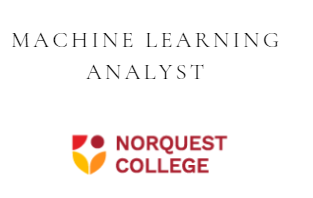

Let's start by loading and examining the Kijiji dataset to understand its structure and the types of data it contains.

# Exploratory Data Analysis

In [2]:
import pandas as pd

data = pd.read_csv('kijiji.csv', encoding='latin1')

In [3]:
# Display the first few rows of the dataset
data.head()

,CSDUID,CSDNAME,Latitude,Longitude,adId,Title,Type,Price,Location,Bedrooms,Bathrooms,Hydro,Heat,Water,Size,Agreement Type,URL,Date Posted
0,3501005,South Glengarry,45.256161,-74.595385,1618448386,2 Bedroom Apartment For Rent In Green Valley,Apartment,"$1,425","Green Valley, ON K0C 1L0",Bedrooms: 2,Bathrooms: 1,N,Y,Y,950,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/25/2022 4:30
1,3501005,South Glengarry,45.192003,-74.374604,1617525343,Private 2 BDR in-law-suite upstairs. 1Aug. $1...,Apartment,"$1,100","21882 Old Hwy 2, Bainsville, ON K0C 1E0, Canada",Bedrooms: 2,Bathrooms: 1,N,N,Y,780,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/18/2022 12:34
2,3501005,South Glengarry,45.146672,-74.579565,1609020142,Beautiful Country House near Williamstown - $2...,House,"$2,700","Williamstown, ON K0C 2J0",Bedrooms: 3,Bathrooms: 2.5,N,Y,Y,"2,200",1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/21/2022 21:51
3,3501005,South Glengarry,45.143726,-74.502708,1617264438,"6686 Lawrence st, South Glengarry K6h 5r5",House,"$1,200","6686 Lawrence St, Cornwall, South Glengarry, ON",Bedrooms: 2,Bathrooms: 1.5,N,N,Y,900,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/16/2022 15:41
4,3501005,South Glengarry,45.068973,-74.542873,1617233473,Water Front House for Rent Long Term,House,"$4,000","19414 Malibu Ln, Summerstown, ON K0C 2E0, Canada",Bedrooms: 2 + Den,Bathrooms: 3,N,Y,Y,"1,400",1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/16/2022 11:33


In [4]:
data.shape

(25732, 18)

We currently have 25732 records/rows and 18 features/columns

# Dataset Features

1.  **adId**: A unique identifier for each listing.
2.  **Title**: The title of the property listing.
3.  **Type**: The type of property (e.g., Apartment, House).
4.  **Price**: The rental price.
5.  **Location**: The geographical location of the property.
6.  **Bedrooms**: The number of bedrooms.
7.  **Bathrooms**: The number of bathrooms.
8.  **Hydro, Heat, Water**: Indicators for utilities included (Yes/No).
9.  **Size**: The size of the property in square feet or meters.
10.  **Agreement Type**: The type of rental agreement.
11.  **URL**: The URL of the listing.
12.  **Date Posted**: The date when the listing was posted.


Before we proceed, we need to preprocess the data. This includes cleaning the data, converting categorical data into a format suitable for modeling, and handling missing values.

Let's view the data types



In [5]:
data.dtypes

CSDUID              int64
CSDNAME            object
Latitude          float64
Longitude         float64
adId                int64
Title              object
Type               object
Price              object
Location           object
Bedrooms           object
Bathrooms          object
Hydro              object
Heat               object
Water              object
Size               object
Agreement Type     object
URL                object
Date Posted        object
dtype: object

# Import Libraries

In [6]:
import numpy as np


# Data Cleaning

In [7]:
# Convert 'Price' to a numeric value
data['Price'] = data['Price'].replace('[\$,]', '', regex=True).astype(float)

In [8]:
data.head()

,CSDUID,CSDNAME,Latitude,Longitude,adId,Title,Type,Price,Location,Bedrooms,Bathrooms,Hydro,Heat,Water,Size,Agreement Type,URL,Date Posted
0,3501005,South Glengarry,45.256161,-74.595385,1618448386,2 Bedroom Apartment For Rent In Green Valley,Apartment,1425.0,"Green Valley, ON K0C 1L0",Bedrooms: 2,Bathrooms: 1,N,Y,Y,950,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/25/2022 4:30
1,3501005,South Glengarry,45.192003,-74.374604,1617525343,Private 2 BDR in-law-suite upstairs. 1Aug. $1...,Apartment,1100.0,"21882 Old Hwy 2, Bainsville, ON K0C 1E0, Canada",Bedrooms: 2,Bathrooms: 1,N,N,Y,780,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/18/2022 12:34
2,3501005,South Glengarry,45.146672,-74.579565,1609020142,Beautiful Country House near Williamstown - $2...,House,2700.0,"Williamstown, ON K0C 2J0",Bedrooms: 3,Bathrooms: 2.5,N,Y,Y,"2,200",1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/21/2022 21:51
3,3501005,South Glengarry,45.143726,-74.502708,1617264438,"6686 Lawrence st, South Glengarry K6h 5r5",House,1200.0,"6686 Lawrence St, Cornwall, South Glengarry, ON",Bedrooms: 2,Bathrooms: 1.5,N,N,Y,900,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/16/2022 15:41
4,3501005,South Glengarry,45.068973,-74.542873,1617233473,Water Front House for Rent Long Term,House,4000.0,"19414 Malibu Ln, Summerstown, ON K0C 2E0, Canada",Bedrooms: 2 + Den,Bathrooms: 3,N,Y,Y,"1,400",1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/16/2022 11:33


In [9]:

# Extract numeric values from 'Bedrooms' and 'Bathrooms'
data['Bedrooms'] = data['Bedrooms'].str.extract('(\d+)').astype(float)
data['Bathrooms'] = data['Bathrooms'].str.extract('(\d+\.?\d*)').astype(float)

In [10]:
data.head()

,CSDUID,CSDNAME,Latitude,Longitude,adId,Title,Type,Price,Location,Bedrooms,Bathrooms,Hydro,Heat,Water,Size,Agreement Type,URL,Date Posted
0,3501005,South Glengarry,45.256161,-74.595385,1618448386,2 Bedroom Apartment For Rent In Green Valley,Apartment,1425.0,"Green Valley, ON K0C 1L0",2.0,1.0,N,Y,Y,950,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/25/2022 4:30
1,3501005,South Glengarry,45.192003,-74.374604,1617525343,Private 2 BDR in-law-suite upstairs. 1Aug. $1...,Apartment,1100.0,"21882 Old Hwy 2, Bainsville, ON K0C 1E0, Canada",2.0,1.0,N,N,Y,780,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/18/2022 12:34
2,3501005,South Glengarry,45.146672,-74.579565,1609020142,Beautiful Country House near Williamstown - $2...,House,2700.0,"Williamstown, ON K0C 2J0",3.0,2.5,N,Y,Y,"2,200",1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/21/2022 21:51
3,3501005,South Glengarry,45.143726,-74.502708,1617264438,"6686 Lawrence st, South Glengarry K6h 5r5",House,1200.0,"6686 Lawrence St, Cornwall, South Glengarry, ON",2.0,1.5,N,N,Y,900,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/16/2022 15:41
4,3501005,South Glengarry,45.068973,-74.542873,1617233473,Water Front House for Rent Long Term,House,4000.0,"19414 Malibu Ln, Summerstown, ON K0C 2E0, Canada",2.0,3.0,N,Y,Y,"1,400",1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/16/2022 11:33


Look at record entry 4 for Bedrooms. It was intially "2+ Den" the regex function picked only the numeric value. However we should account for the Den.
 The expression (\d+) captures only the digits before the space, so for "2 + Den", it only captures "2".

 To handle cases like "2 + Den" appropriately, we need to:

1.  **Create a Temporary Column**: First, identify rows with '+ Den' and mark them in a temporary column.
2.  **Convert 'Bedrooms' to Numeric**: Extract the numeric part and convert it to float.
3.  **Adjust for '+ Den'**: Increase the bedroom count for rows marked in the temporary column.
4.  **Clean Up**: Drop the temporary column.



# Reload the Dataset

In [11]:
data = pd.read_csv('kijiji.csv', encoding='latin1')

In [12]:
# Convert 'Price' to a numeric value
data['Price'] = data['Price'].replace('[\$,]', '', regex=True).astype(float)

# Extract numeric values from 'Bathrooms'
data['Bathrooms'] = data['Bathrooms'].str.extract('(\d+\.?\d*)').astype(float)

In [13]:
# Create a temporary column to mark rows with "+ Den"
data['Temp_Den'] = data['Bedrooms'].str.contains('\+ Den')

# Extract numeric values from 'Bedrooms'
data['Bedrooms'] = data['Bedrooms'].str.extract('(\d+)').astype(float)




In [14]:
data.head()

,CSDUID,CSDNAME,Latitude,Longitude,adId,Title,Type,Price,Location,Bedrooms,Bathrooms,Hydro,Heat,Water,Size,Agreement Type,URL,Date Posted,Temp_Den
0,3501005,South Glengarry,45.256161,-74.595385,1618448386,2 Bedroom Apartment For Rent In Green Valley,Apartment,1425.0,"Green Valley, ON K0C 1L0",2.0,1.0,N,Y,Y,950,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/25/2022 4:30,False
1,3501005,South Glengarry,45.192003,-74.374604,1617525343,Private 2 BDR in-law-suite upstairs. 1Aug. $1...,Apartment,1100.0,"21882 Old Hwy 2, Bainsville, ON K0C 1E0, Canada",2.0,1.0,N,N,Y,780,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/18/2022 12:34,False
2,3501005,South Glengarry,45.146672,-74.579565,1609020142,Beautiful Country House near Williamstown - $2...,House,2700.0,"Williamstown, ON K0C 2J0",3.0,2.5,N,Y,Y,"2,200",1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/21/2022 21:51,False
3,3501005,South Glengarry,45.143726,-74.502708,1617264438,"6686 Lawrence st, South Glengarry K6h 5r5",House,1200.0,"6686 Lawrence St, Cornwall, South Glengarry, ON",2.0,1.5,N,N,Y,900,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/16/2022 15:41,False
4,3501005,South Glengarry,45.068973,-74.542873,1617233473,Water Front House for Rent Long Term,House,4000.0,"19414 Malibu Ln, Summerstown, ON K0C 2E0, Canada",2.0,3.0,N,Y,Y,"1,400",1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/16/2022 11:33,True


In [15]:
# Adjust for '+ Den'
data.loc[data['Temp_Den'], 'Bedrooms'] += 0.5

# Drop the temporary column
data.drop('Temp_Den', axis=1, inplace=True)

In [16]:
data.head()

,CSDUID,CSDNAME,Latitude,Longitude,adId,Title,Type,Price,Location,Bedrooms,Bathrooms,Hydro,Heat,Water,Size,Agreement Type,URL,Date Posted
0,3501005,South Glengarry,45.256161,-74.595385,1618448386,2 Bedroom Apartment For Rent In Green Valley,Apartment,1425.0,"Green Valley, ON K0C 1L0",2.0,1.0,N,Y,Y,950,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/25/2022 4:30
1,3501005,South Glengarry,45.192003,-74.374604,1617525343,Private 2 BDR in-law-suite upstairs. 1Aug. $1...,Apartment,1100.0,"21882 Old Hwy 2, Bainsville, ON K0C 1E0, Canada",2.0,1.0,N,N,Y,780,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/18/2022 12:34
2,3501005,South Glengarry,45.146672,-74.579565,1609020142,Beautiful Country House near Williamstown - $2...,House,2700.0,"Williamstown, ON K0C 2J0",3.0,2.5,N,Y,Y,"2,200",1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/21/2022 21:51
3,3501005,South Glengarry,45.143726,-74.502708,1617264438,"6686 Lawrence st, South Glengarry K6h 5r5",House,1200.0,"6686 Lawrence St, Cornwall, South Glengarry, ON",2.0,1.5,N,N,Y,900,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/16/2022 15:41
4,3501005,South Glengarry,45.068973,-74.542873,1617233473,Water Front House for Rent Long Term,House,4000.0,"19414 Malibu Ln, Summerstown, ON K0C 2E0, Canada",2.5,3.0,N,Y,Y,"1,400",1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/16/2022 11:33


In [17]:

# Convert 'Size' to a numeric value
data['Size'] = data['Size'].replace('[\,]', '', regex=True).astype(float)

ValueError: could not convert string to float: 'Not Available'

To fix the error caused by non-numeric values in the 'Size' column when converting it to a float, we have to:

1.  **Replace Non-Numeric Values**: Replace values like 'Not Available' with `NaN` (Not a Number).
2.  **Convert to Float**: Convert the column to a float type.
3.  **Handle NaN Values**: Decide how to handle these NaN values. Common strategies include filling them with a specific value (like the mean or median of the column) or dropping rows with NaN values.



In [18]:

# Replace non-numeric values (like 'Not Available') with NaN and convert the column to float
data['Size'] = pd.to_numeric(data['Size'].replace('Not Available', np.nan), errors='coerce')

# Handling NaN values by replacing with the mean


# Visualize missing Data

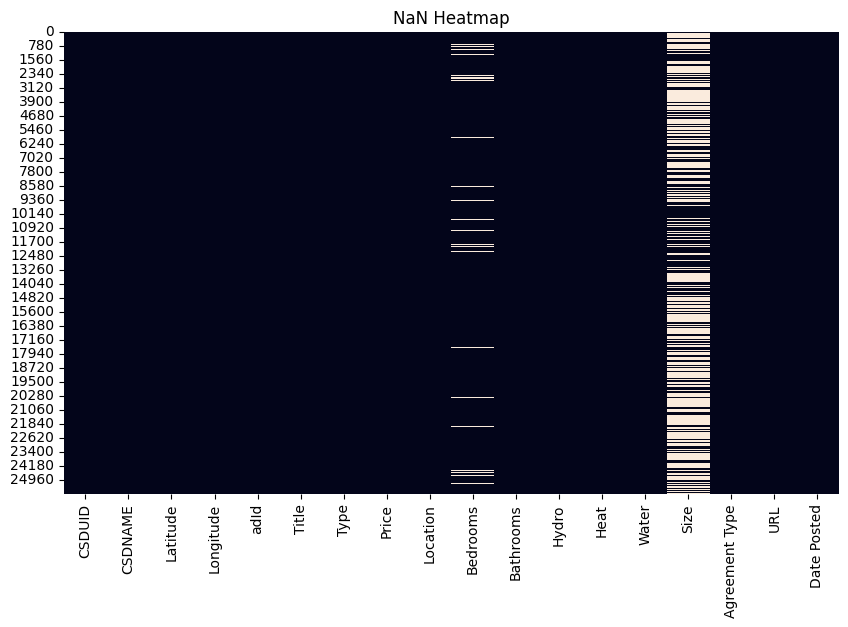

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.isna(), cbar=False)
plt.title("NaN Heatmap")
plt.show()


# Option 1: Fill NaN with the mean or median

In [ ]:


# data['Size'].fillna(data['Size'].mean(), inplace=True)
# Or
# data['Size'].fillna(data['Size'].median(), inplace=True)





# Option 2: Drop rows with NaN in 'Size'

In [ ]:

# data.dropna(subset=['Size'], inplace=True)

# Option 3: Impute based on Category



Alternatively, we could impute missing "Size" values based on the median or mean size of properties with similar characteristics. For instanceby "Type," and then impute missing sizes within those groups based on the median or mean size of properties in the same group.

In [20]:
# Impute missing 'Size' values based on the median 'Size' of each 'Type'
data['Size'] = data.groupby('Type')['Size'].transform(lambda x: x.fillna(x.median()))


In [21]:

# Impute missing 'Bedrooms' values based on the median 'Bedrooms' of each 'Type'
data['Bedrooms'] = data.groupby('Type')['Bedrooms'].transform(lambda x: x.fillna(x.median()))


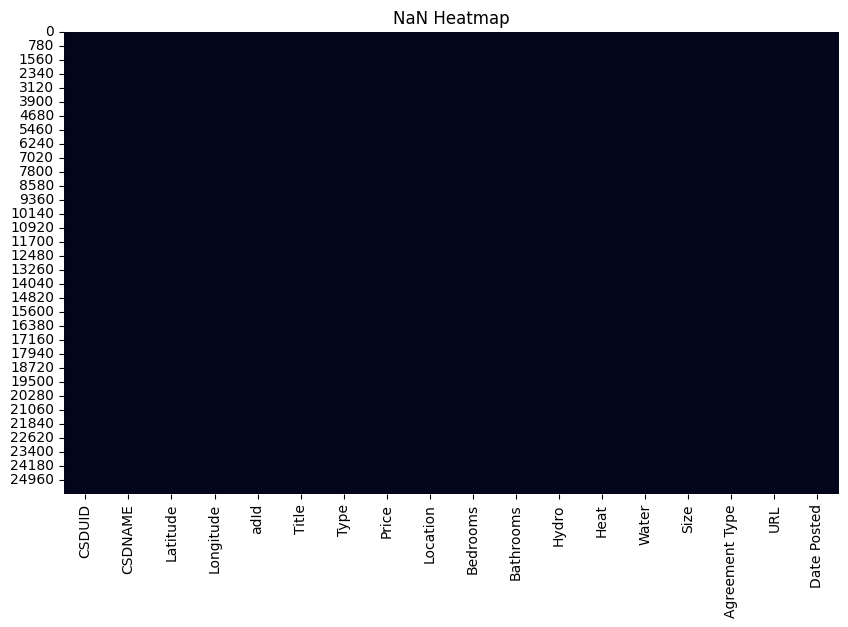

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isna(), cbar=False)
plt.title("NaN Heatmap")
plt.show()

In [23]:
data.shape

(25732, 18)

In real estate, the terms "water," "heat," and "hydro" are related to utility services and can be important factors for both buyers and sellers to consider.

1. Water:
   - Water supply is a crucial consideration when buying or selling real estate. Buyers want to ensure a reliable source of clean water for their property, while sellers need to disclose any known water-related issues.
   - Access to municipal water systems or reliance on a well can impact property value and maintenance costs.

   
2. Heat:
   - In the context of real estate, "heat" typically refers to the heating system of a property.
   - Common heating systems include forced-air furnaces, boilers, heat pumps, and electric baseboard heaters.

   
3. Hydro:
   - "Hydro" is often used as a colloquial term for electricity, especially in some regions like Canada. It's derived from hydroelectric power generation.




In [24]:
# Convert binary features like Hydro, Heat, Water From "N and Y" to "0 and 1"
binary_features = ['Hydro', 'Heat', 'Water']
data[binary_features] = data[binary_features].replace({'Y': 1, 'N': 0})

In [25]:
data.head()

,CSDUID,CSDNAME,Latitude,Longitude,adId,Title,Type,Price,Location,Bedrooms,Bathrooms,Hydro,Heat,Water,Size,Agreement Type,URL,Date Posted
0,3501005,South Glengarry,45.256161,-74.595385,1618448386,2 Bedroom Apartment For Rent In Green Valley,Apartment,1425.0,"Green Valley, ON K0C 1L0",2.0,1.0,0,1,1,950.0,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/25/2022 4:30
1,3501005,South Glengarry,45.192003,-74.374604,1617525343,Private 2 BDR in-law-suite upstairs. 1Aug. $1...,Apartment,1100.0,"21882 Old Hwy 2, Bainsville, ON K0C 1E0, Canada",2.0,1.0,0,0,1,780.0,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/18/2022 12:34
2,3501005,South Glengarry,45.146672,-74.579565,1609020142,Beautiful Country House near Williamstown - $2...,House,2700.0,"Williamstown, ON K0C 2J0",3.0,2.5,0,1,1,650.0,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/21/2022 21:51
3,3501005,South Glengarry,45.143726,-74.502708,1617264438,"6686 Lawrence st, South Glengarry K6h 5r5",House,1200.0,"6686 Lawrence St, Cornwall, South Glengarry, ON",2.0,1.5,0,0,1,900.0,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/16/2022 15:41
4,3501005,South Glengarry,45.068973,-74.542873,1617233473,Water Front House for Rent Long Term,House,4000.0,"19414 Malibu Ln, Summerstown, ON K0C 2E0, Canada",2.5,3.0,0,1,1,650.0,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/16/2022 11:33


In [26]:

# Convert 'Date Posted' to datetime
data['Date Posted'] = pd.to_datetime(data['Date Posted'])

In [27]:
data.head()

,CSDUID,CSDNAME,Latitude,Longitude,adId,Title,Type,Price,Location,Bedrooms,Bathrooms,Hydro,Heat,Water,Size,Agreement Type,URL,Date Posted
0,3501005,South Glengarry,45.256161,-74.595385,1618448386,2 Bedroom Apartment For Rent In Green Valley,Apartment,1425.0,"Green Valley, ON K0C 1L0",2.0,1.0,0,1,1,950.0,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,2022-05-25 04:30:00
1,3501005,South Glengarry,45.192003,-74.374604,1617525343,Private 2 BDR in-law-suite upstairs. 1Aug. $1...,Apartment,1100.0,"21882 Old Hwy 2, Bainsville, ON K0C 1E0, Canada",2.0,1.0,0,0,1,780.0,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,2022-05-18 12:34:00
2,3501005,South Glengarry,45.146672,-74.579565,1609020142,Beautiful Country House near Williamstown - $2...,House,2700.0,"Williamstown, ON K0C 2J0",3.0,2.5,0,1,1,650.0,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,2022-05-21 21:51:00
3,3501005,South Glengarry,45.143726,-74.502708,1617264438,"6686 Lawrence st, South Glengarry K6h 5r5",House,1200.0,"6686 Lawrence St, Cornwall, South Glengarry, ON",2.0,1.5,0,0,1,900.0,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,2022-05-16 15:41:00
4,3501005,South Glengarry,45.068973,-74.542873,1617233473,Water Front House for Rent Long Term,House,4000.0,"19414 Malibu Ln, Summerstown, ON K0C 2E0, Canada",2.5,3.0,0,1,1,650.0,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,2022-05-16 11:33:00


In [28]:
data.dtypes

CSDUID                     int64
CSDNAME                   object
Latitude                 float64
Longitude                float64
adId                       int64
Title                     object
Type                      object
Price                    float64
Location                  object
Bedrooms                 float64
Bathrooms                float64
Hydro                      int64
Heat                       int64
Water                      int64
Size                     float64
Agreement Type            object
URL                       object
Date Posted       datetime64[ns]
dtype: object

CSDName, Title, Type,Location, Agreement Type, and URL are still objects. Let's review those columns

Let's explore how relevant these columns could be to prediction.


In [29]:
data.nunique()

CSDUID              267
CSDNAME             266
Latitude          17554
Longitude         16214
adId              24689
Title             22747
Type                  6
Price              1281
Location          18645
Bedrooms              9
Bathrooms            11
Hydro                 2
Heat                  2
Water                 2
Size                725
Agreement Type        3
URL               24929
Date Posted       15850
dtype: int64

**"CSDUID"** has 220 unique values
**"CSDNAme"** has 219 unique values
It seems logical to assume that The IDs are related to the names. we can drop one of these columns.(CSDUID)

**"adId"** has 24689- too much granularity. We can drop this

**"Title"** has 22747 - We could use this later for sentiment analysis. For now , we will drop this.

**"Type"** has 6 unique values, enough variability to offer prediction. We will keep this.


**"Location"** has 18645 - too much granularity.We also have Lat & Long data for geo analysis. We can drop this.

 **"Agreement Type**" has 3 unique values. we will lwave this.

**"URL"** has 24929 - too much granularity. We can drop this



In [30]:
# list the unique values in "Agreement Type"

data['Agreement Type'].unique()


array(['1 Year', 'Month-to-month', 'Not Available'], dtype=object)

In [31]:
columns_to_drop = ['Title','adId','Location','URL']
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# columns_to_drop = ['CSDUID','Title','adId','Location','URL']
# data.drop(columns=columns_to_drop, inplace=True)

In [32]:
data.head()

,CSDUID,CSDNAME,Latitude,Longitude,Type,Price,Bedrooms,Bathrooms,Hydro,Heat,Water,Size,Agreement Type,Date Posted
0,3501005,South Glengarry,45.256161,-74.595385,Apartment,1425.0,2.0,1.0,0,1,1,950.0,1 Year,2022-05-25 04:30:00
1,3501005,South Glengarry,45.192003,-74.374604,Apartment,1100.0,2.0,1.0,0,0,1,780.0,1 Year,2022-05-18 12:34:00
2,3501005,South Glengarry,45.146672,-74.579565,House,2700.0,3.0,2.5,0,1,1,650.0,1 Year,2022-05-21 21:51:00
3,3501005,South Glengarry,45.143726,-74.502708,House,1200.0,2.0,1.5,0,0,1,900.0,1 Year,2022-05-16 15:41:00
4,3501005,South Glengarry,45.068973,-74.542873,House,4000.0,2.5,3.0,0,1,1,650.0,1 Year,2022-05-16 11:33:00


# Check for missing values

In [33]:
nan_counts = data.isna().sum()
print(nan_counts)


CSDUID            0
CSDNAME           0
Latitude          0
Longitude         0
Type              0
Price             0
Bedrooms          0
Bathrooms         0
Hydro             0
Heat              0
Water             0
Size              0
Agreement Type    0
Date Posted       0
dtype: int64


In [ ]:
# # Dropping rows with missing values
# data_cleaned = data.dropna()

In [ ]:

# # Displaying the shape of the original and cleaned data for comparison
# original_shape = data.shape
# cleaned_shape = data_cleaned.shape
# print("Original Shape:", original_shape)
# print("Cleaned Shape:", cleaned_shape)

# Calculate Percentage of Data retained

In [ ]:
# # Assuming 'data' is your original DataFrame and 'data_cleaned' is after dropping NaN values
# percentage_retained = (len(data_cleaned) / len(data)) * 100

# print("Percentage of Data Retained after Dropping NaN values:", percentage_retained)


In [ ]:
# #Reassign to data
# data = data.dropna()

# Data Exploration: Overview of the cleaned data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25732 entries, 0 to 25731
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CSDNAME         25732 non-null  object        
 1   Latitude        25732 non-null  float64       
 2   Longitude       25732 non-null  float64       
 3   Type            25732 non-null  object        
 4   Price           25732 non-null  float64       
 5   Bedrooms        25732 non-null  float64       
 6   Bathrooms       25732 non-null  float64       
 7   Hydro           25732 non-null  int64         
 8   Heat            25732 non-null  int64         
 9   Water           25732 non-null  int64         
 10  Size            25732 non-null  float64       
 11  Agreement Type  25732 non-null  object        
 12  Date Posted     25732 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 2.6+ MB


In [ ]:
data.dtypes

CSDNAME                   object
Latitude                 float64
Longitude                float64
Type                      object
Price                    float64
Bedrooms                 float64
Bathrooms                float64
Hydro                      int64
Heat                       int64
Water                      int64
Size                     float64
Agreement Type            object
Date Posted       datetime64[ns]
dtype: object

In [34]:
data['CSDNAME'] = data['CSDNAME'].astype('category')
data['Type'] = data['Type'].astype('category')
data['Agreement Type'] = data['Agreement Type'].astype('category')

In [35]:
data.dtypes

CSDUID                     int64
CSDNAME                 category
Latitude                 float64
Longitude                float64
Type                    category
Price                    float64
Bedrooms                 float64
Bathrooms                float64
Hydro                      int64
Heat                       int64
Water                      int64
Size                     float64
Agreement Type          category
Date Posted       datetime64[ns]
dtype: object

# Descriptive Statistics

In [ ]:
data.describe()

,Latitude,Longitude,Price,Bedrooms,Bathrooms,Hydro,Heat,Water,Size
count,25732.000000,25732.000000,25732.000000,25732.000000,25732.000000,25732.000000,25732.000000,25732.000000,25732.000000
mean,43.958750,-79.209807,2138.761611,2.185178,1.465354,0.261037,0.497124,0.559925,662.114604
std,0.959821,2.005984,766.018814,1.001459,0.756249,0.439208,0.500001,0.496406,158.127860
min,41.986668,-94.488329,285.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-5.000000
25%,43.466763,-79.844889,1600.000000,1.000000,1.000000,0.000000,0.000000,0.000000,650.000000
50%,43.706669,-79.442185,2000.000000,2.000000,1.000000,0.000000,0.000000,1.000000,675.000000
75%,44.236973,-79.087851,2550.000000,3.000000,2.000000,1.000000,1.000000,1.000000,700.000000
max,49.799160,-74.374604,8800.000000,5.000000,6.000000,1.000000,1.000000,1.000000,999.000000


In [ ]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 CSDNAME           0
Latitude          0
Longitude         0
Type              0
Price             0
Bedrooms          0
Bathrooms         0
Hydro             0
Heat              0
Water             0
Size              0
Agreement Type    0
Date Posted       0
dtype: int64


In [ ]:
# Drop duplicate rows
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(25675, 13)

# save data to csv

In [36]:


data.to_csv('kijiji_cleaned.csv', index=False)


# Exploratory Data Analysis (EDA)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


## 1.  **Distribution of Rental Prices**:
The histogram shows the distribution of rental prices across the listings. It helps in understanding the range and frequency of prices.

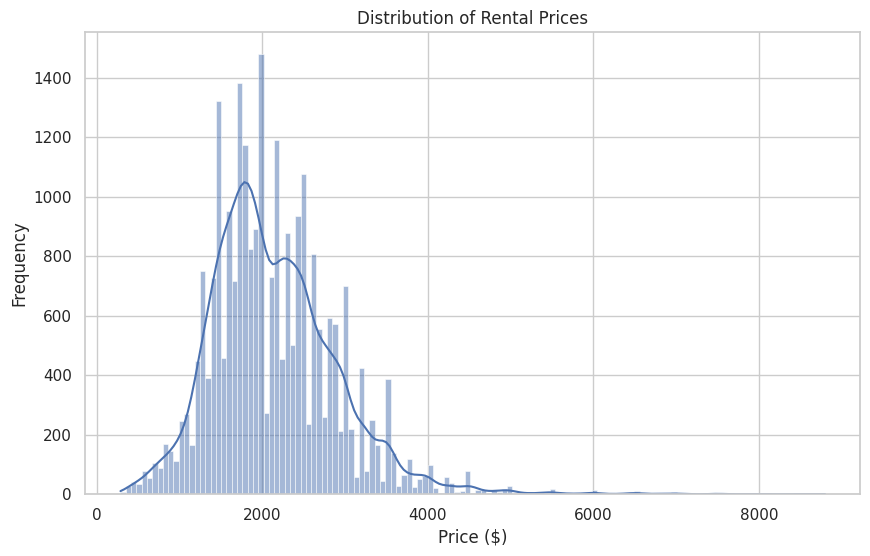

In [ ]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True)
plt.title('Distribution of Rental Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

## 2.  **Price Distribution by Property Type**:

The boxplot shows how rental prices vary with different property types. This visualization helps in understanding if certain types of properties (e.g., apartments, houses) tend to have higher or lower rental prices.

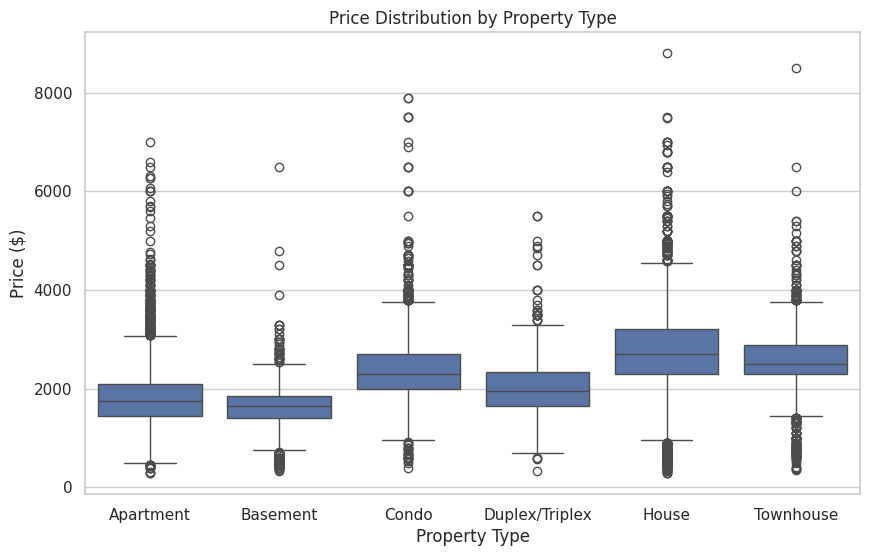

In [ ]:
# Boxplot for Price by Property Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=data)
plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price ($)')
plt.show()

## 3.  **Price vs. Numeric Features (Bedrooms, Bathrooms, Size)**:
    


**Price vs. Bedrooms**: Indicates a trend where the number of bedrooms might influence the rental price.

**Price vs. Bathrooms**: Similar to bedrooms, the number of bathrooms seems to have a relationship with the rental price.

**Price vs. Size**: There's a positive correlation between the size of the property and the rental price.

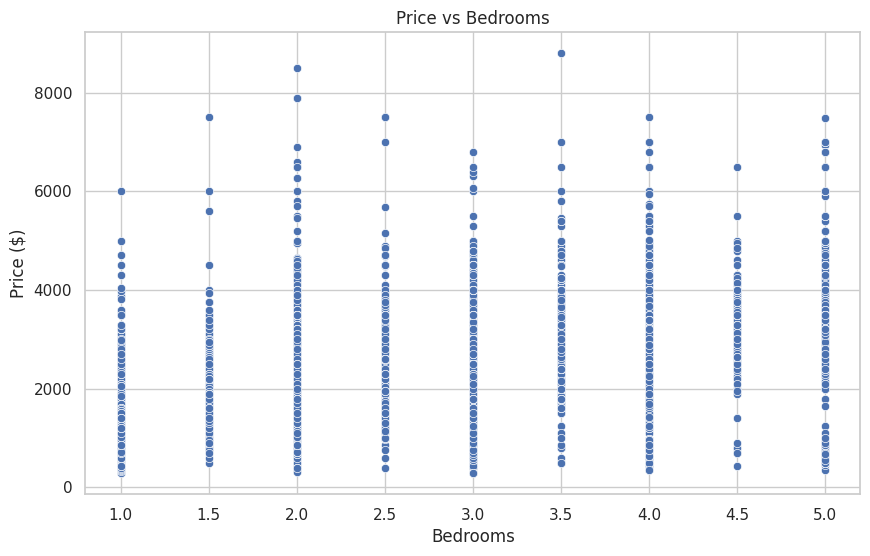

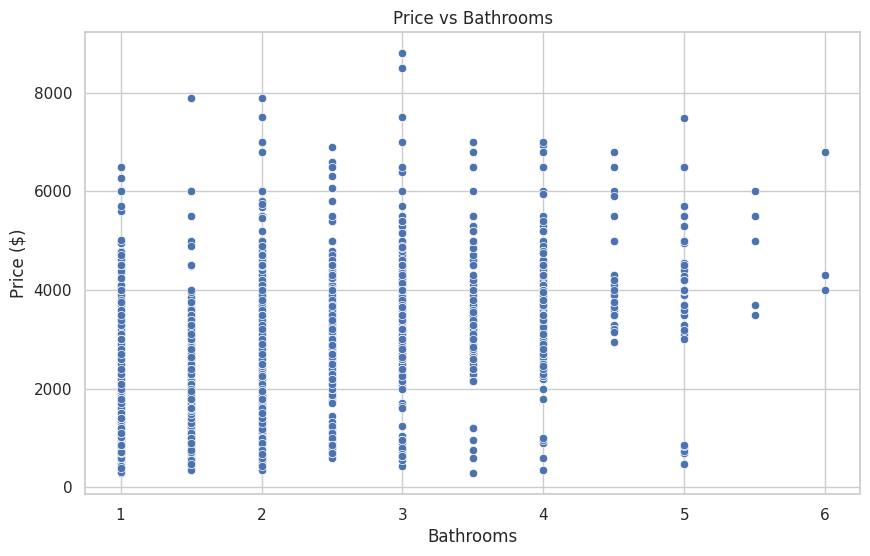

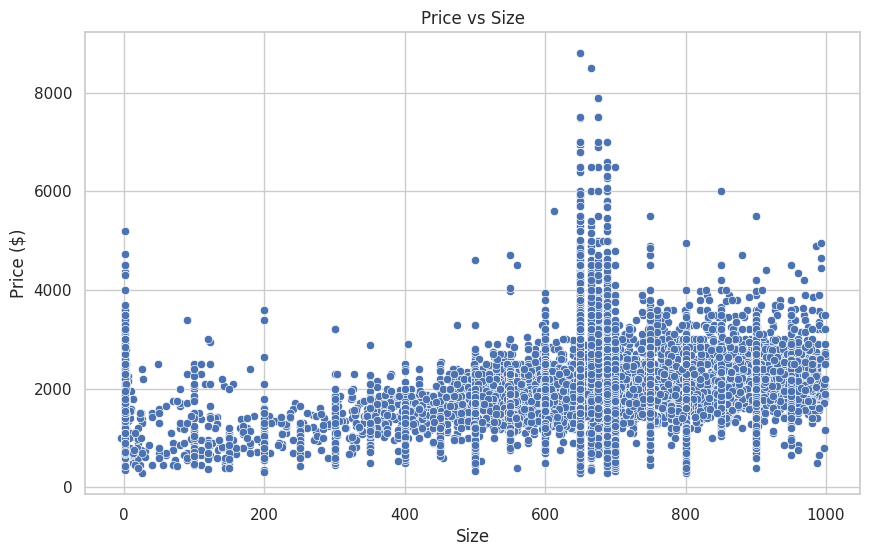

In [ ]:
# Relationship between Price and other numeric features
numeric_features = ['Bedrooms', 'Bathrooms', 'Size']
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[feature], y=data['Price'])
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price ($)')
    plt.show()


##    4.  **Correlation Heatmap**:


    






This heatmap shows the correlation between different numeric features, including the price. A high positive correlation suggests a strong relationship between the features.

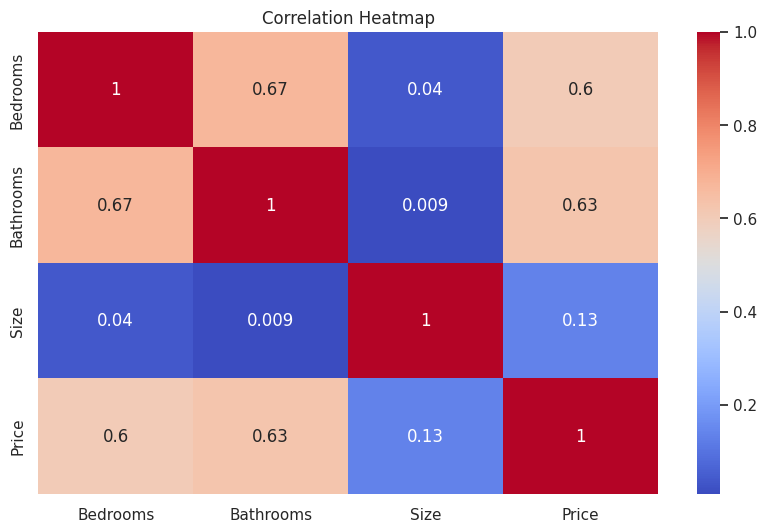

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[numeric_features + ['Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#AutoEDA

AutoEDA (Automated Exploratory Data Analysis) is a process where various summarizations, visualizations, and the initial analysis of the data are performed automatically by tools and libraries. This can save a significant amount of time, especially during the early stages of data analysis.

Examples include Pandas Profiling, Dtale , Sweetviz etc

# Sweetviz:

 An open-source Python library that generates beautiful, high-density visualizations to start your EDA with just two lines of code.

In [ ]:
 !pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 51.4 MB/s eta 0:00:00


In [ ]:
 import sweetviz as sv
 report = sv.analyze(data)
 report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


View Downloaded HTML report in RHS Menu



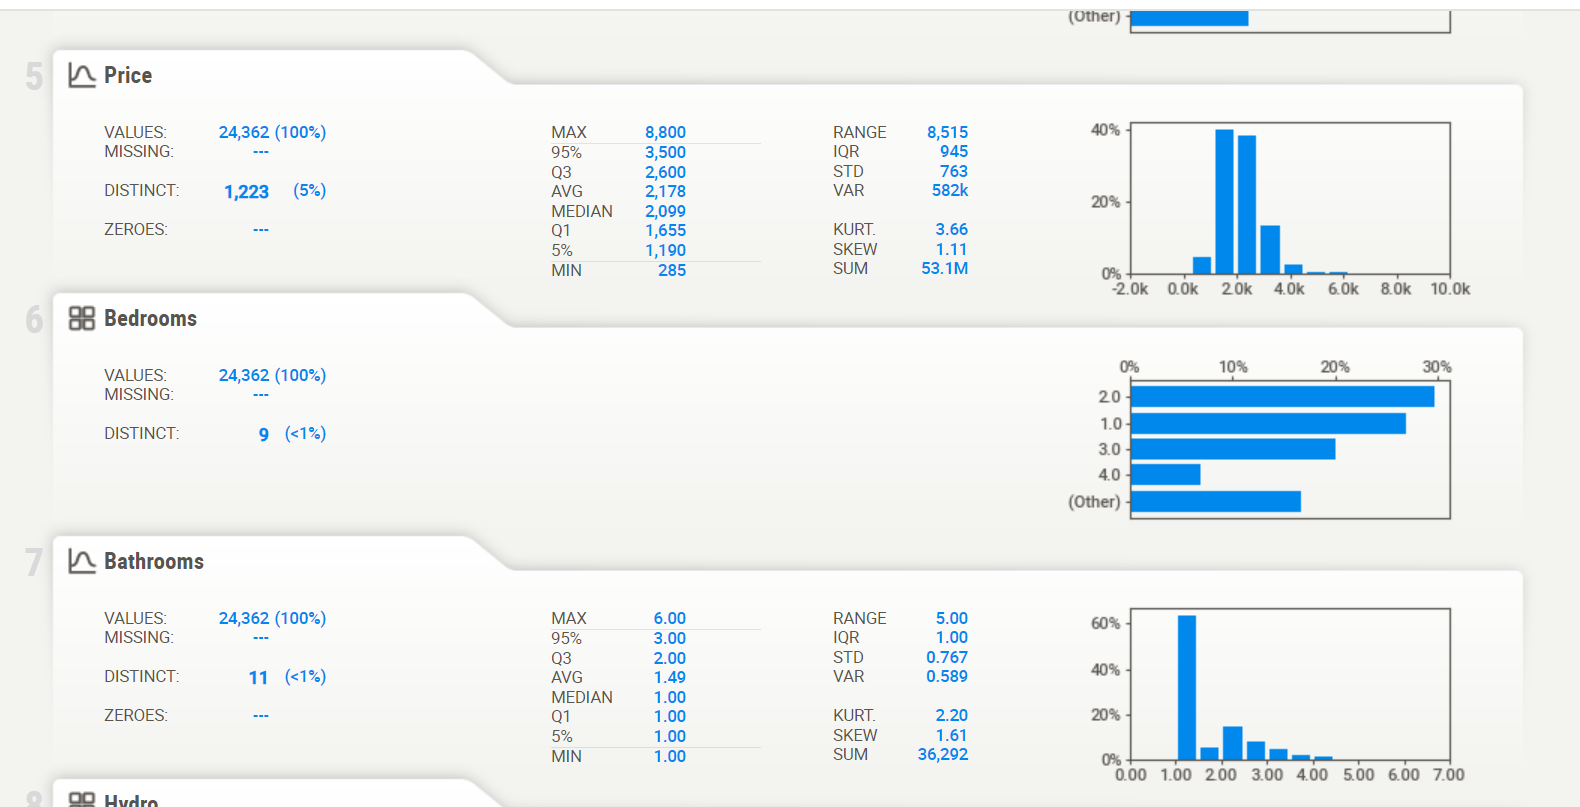

# Autoviz

**AutoViz**: Automatically visualizes any dataset with a single line of code. It can be particularly useful for quickly drawing insights from a new dataset.

In [ ]:
 !pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 10.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20

In [ ]:
 %matplotlib inline
 from autoviz.AutoViz_Class import AutoViz_Class
 AV = AutoViz_Class()
 report = AV.AutoViz('kijiji_cleaned.csv')

Imported v0.1.804. After importing autoviz, you must run '%matplotlib inline' to display charts inline.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (25675, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  1
    Number of NLP String C

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
CSDNAME,object,0.000000,1,,,Possible high cardinality column with 266 unique values: Use hash encoding or text embedding to reduce dimension.
Latitude,float64,0.000000,NA,41.986668,49.799160,Column has 3702 outliers greater than upper bound (45.39) or lower than lower bound(42.31). Cap them or remove them.
Longitude,float64,0.000000,NA,-94.488329,-74.374604,Column has 7810 outliers greater than upper bound (-77.96) or lower than lower bound(-80.98). Cap them or remove them.
Type,object,0.000000,0,,,No issue
Price,float64,0.000000,NA,285.000000,8800.000000,Column has 549 outliers greater than upper bound (3975.00) or lower than lower bound(175.00). Cap them or remove them.
Bedrooms,float64,0.000000,NA,1.000000,5.000000,No issue
Bathrooms,float64,0.000000,NA,1.000000,6.000000,Column has 467 outliers greater than upper bound (3.50) or lower than lower bound(-0.50). Cap them or remove them.
Hydro,int64,0.000000,0,0.000000,1.000000,No issue
Heat,int64,0.000000,0,0.000000,1.000000,No issue
Water,int64,0.000000,0,0.000000,1.000000,No issue


Number of All Scatter Plots = 21


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Could not draw wordcloud plot for Date Posted
All Plots done
Time to run AutoViz = 51 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.1 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252702 sha256=a2ce7767c44e08fd2508778a5808db27962525949fed297a275986ca8b9c27b9
  Stored in directory: /ro

You might need to restart the session to load dataprep.

When you restart session, you sill need to reupload the cleaned dataset.

In [ ]:
# load kijiji_cleaned.csv
import pandas as pd
data = pd.read_csv('kijiji_cleaned.csv')


In [ ]:
from dataprep.eda import create_report
create_report(data)

Output hidden; open in https://colab.research.google.com to view.

# Pros & Cons of AutoEDA

Automated Exploratory Data Analysis (AutoEDA) tools offer several advantages and some drawbacks. Here's an overview:

### Pros of AutoEDA

1. **Time Efficiency**: AutoEDA tools can significantly reduce the time it takes to perform initial data analysis by automating common tasks like summarizing data, checking for missing values, and creating basic visualizations.

2. **Ease of Use**: These tools are often user-friendly and do not require extensive coding knowledge, making them accessible to a broader range of users, including those who may not be proficient in programming.

3. **Consistency**: AutoEDA ensures a standardized approach to initial data analysis, which can be particularly useful in team settings or when working on multiple projects.

4. **Comprehensive Analysis**: Many AutoEDA tools provide a wide range of analyses and visualizations that a user might not think of doing manually. They can uncover insights that might otherwise be missed.

5. **Good Starting Point**: AutoEDA provides a good overview of the data and can help in identifying areas that require deeper analysis.

### Cons of AutoEDA

1. **Lack of Customization**: While AutoEDA tools provide a broad overview, they may lack the flexibility for customized or domain-specific analysis that a data scientist might perform manually.

2. **Overlook Specific Insights**: Automated analysis might overlook nuances or specific insights that are more apparent when a human analyst applies their domain knowledge and intuition to the data.

3. **Computationally Intensive**: Some AutoEDA tools can be computationally intensive, especially with large datasets, leading to long processing times.

4. **One-size-fits-all Approach**: The general nature of the analysis might not be suitable for all types of data or research questions. It may provide a lot of unnecessary information while missing out on important specific details.

5. **Potential for Misinterpretation**: Users who rely solely on AutoEDA without a good understanding of the underlying methodologies might misinterpret the results, especially if the tool does not provide clear explanations of its outputs.

6. **Data Privacy Concerns**: When using cloud-based AutoEDA tools, there may be concerns regarding data security and privacy, especially with sensitive data.

### Conclusion

AutoEDA is a powerful tool for quickly gaining insights from a dataset, particularly during the initial phases of data analysis. However, it's important to complement it with manual, in-depth analysis, especially for complex datasets or when domain-specific knowledge is required. AutoEDA should be seen as a complement to, rather than a replacement for, traditional data analysis methods.

# Interview Readiness

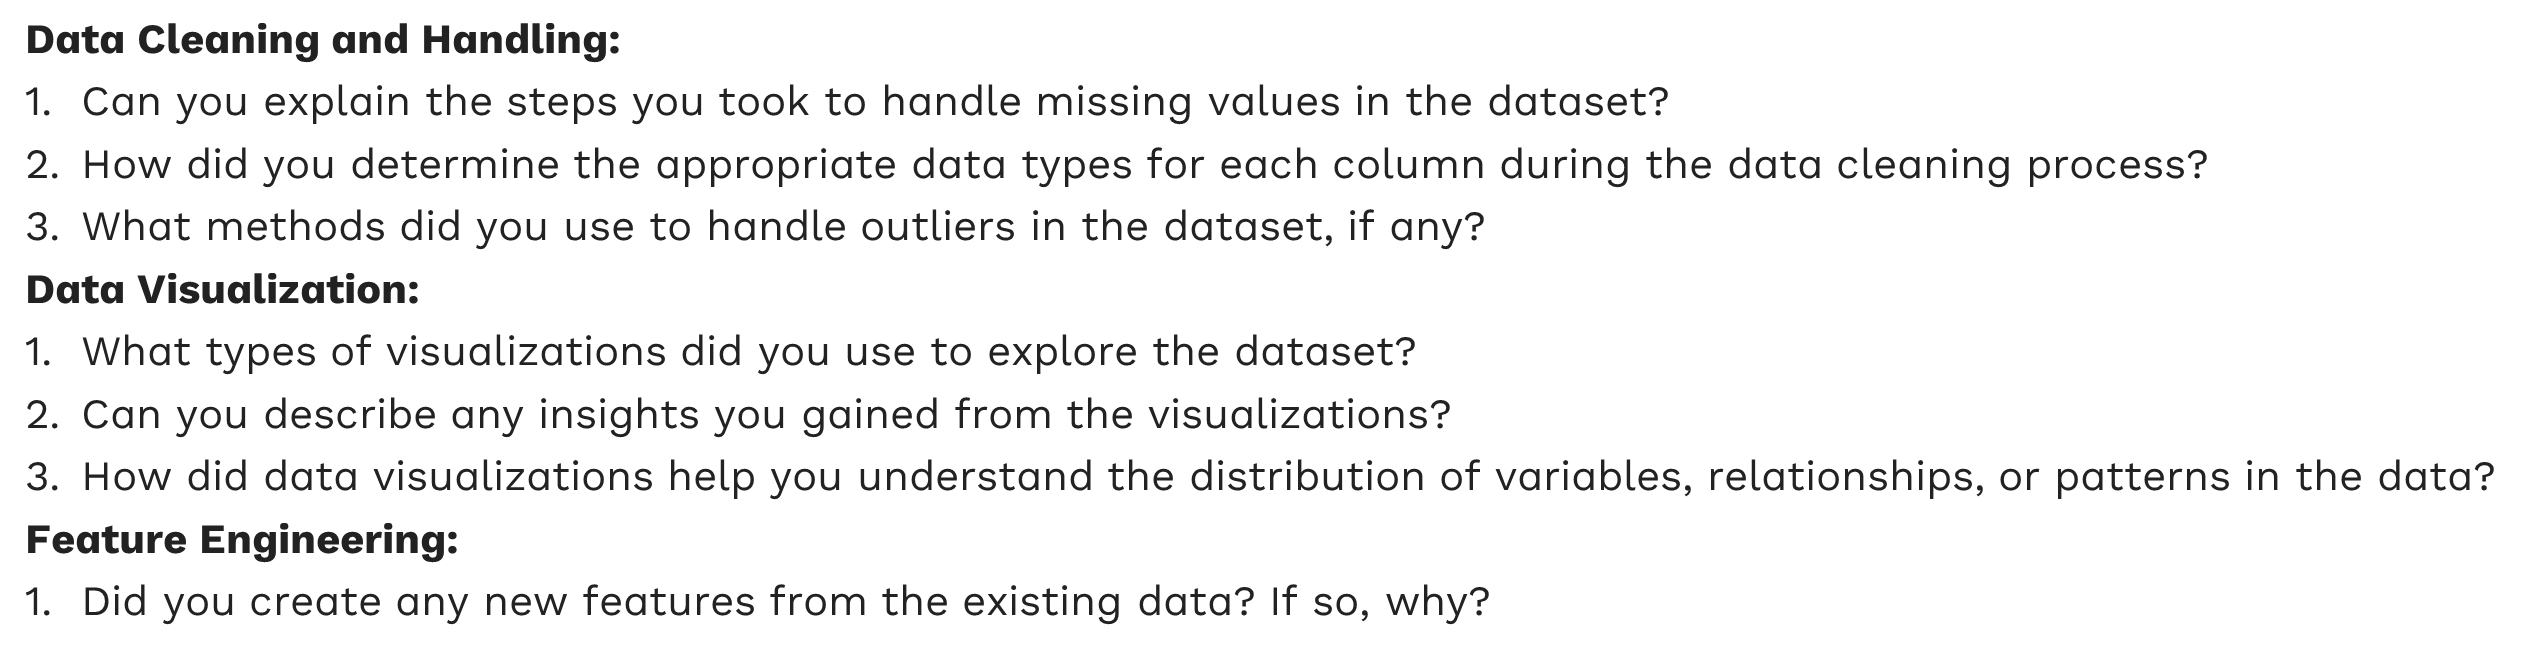

# Other Visualizations


1. **Bar Chart for Bags Collected:**
   - Display the total number of bags collected for each region, ward, or route. This helps in comparing collection efficiency across different areas.

2. **Pie Chart for Bags Collected by Region:**
   - Show the percentage distribution of bags collected across different regions. Each slice represents a region, and the size of the slice indicates the proportion of bags collected.

3. **Line Chart for Time Spent:**
   - Plot the average time spent on each route over time. This chart can help identify trends in the time taken for collections.

4. **Stacked Bar Chart for Bags Collected by Ward:**
   - Display the number of bags collected in each ward, with different colors representing different routes within the ward. This helps in understanding route-wise collections within a ward.

5. **Bubble Chart for Time Spent vs. Bags Collected:**
   - Represent each route as a bubble where the X-axis is the time spent, the Y-axis is the bags collected, and the size of the bubble represents the number of collections. This chart can reveal efficiency outliers.

6. **Heatmap for Bags Collected and Time Spent:**
   - Create a heatmap where the X-axis represents time spent, the Y-axis represents routes, and the color intensity represents the number of bags collected. This visualization helps identify patterns based on both time spent and bags collected.

7. **Bar Chart for Average Time Spent by Ward:**
   - Display the average time spent on routes within each ward. This can help identify wards with particularly time-consuming routes.

8. **Box Plot for Time Spent:**
   - Use a box plot to show the distribution of time spent on different routes. This visualization provides insights into the variability in collection times.

9. **Donut Chart for Bags Collected by Route:**
   - Display the proportion of bags collected by different routes within a ward. The inner circle represents the total bags collected in the ward, and the outer ring shows the distribution by routes.

10. **Choropleth Map for Bags Collected by Region:**
    - Use a map visualization where regions are shaded based on the total bags collected. Darker shades represent higher collections, providing a geographic perspective